## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results_df, mouse_metadata_df, on="Mouse ID")
# Display the data table for preview
combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
# Grab the "Mouse ID" from the combined_data_df to convert df to Series
# Use the unique() method on the Series to fine the unique mice
# Then use the len() method to find the number of unique mice in the Series
number_of_unique_mice = len(combined_data_df['Mouse ID'].unique())
number_of_unique_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_data_df[['Mouse ID', 'Timepoint']].value_counts()

Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
                      ..
q610      30           1
          35           1
q633      0            1
          5            1
a203      0            1
Length: 1888, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_no_dupes_df = combined_data_df.drop_duplicates(subset=['Mouse ID'])
data_no_dupes_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [6]:
# Checking the number of mice in the clean DataFrame.
len(data_no_dupes_df['Mouse ID'])

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen

# Grab all unique Drug Regimens and put them in a dataframe 
regimens = pd.DataFrame(combined_data_df['Drug Regimen'].unique(), columns=['Regimens'])
# Set the index of the regimens DataFrame to Regimens
regimens = regimens.set_index('Regimens')

# Store the regimens in a new variable so that we can loop through them
all_regimens = combined_data_df['Drug Regimen'].unique()

# Create a new list for the mean, median, variance, Standard Deviation, and SEM of the tumor volume
regimens_df = []
regimen_mean_series = []
regimen_median_series = []
regimen_standard_deviation_series = []
regimen_variance_series = []
regimen_sem_series = []

# Loop through the unique regimens
for regimen in all_regimens:
    # Create a new DataFrame for each regimen and save them in a list
    regimens_df.append(combined_data_df.loc[lambda combined_data_df: combined_data_df['Drug Regimen'] == regimen])


# Loop through the regimens_df list
for regimen in regimens_df:
    # For each regimen, calculate the mean, median, standard deviation, variance, and SEM for the tumor volume
    # and save them in a Series
    regimen_mean_series.append(regimen['Tumor Volume (mm3)'].mean())
    regimen_median_series.append(regimen['Tumor Volume (mm3)'].median())
    regimen_standard_deviation_series.append(regimen['Tumor Volume (mm3)'].std())
    regimen_variance_series.append(regimen['Tumor Volume (mm3)'].var())
    regimen_sem_series.append(regimen['Tumor Volume (mm3)'].sem())


# Append the Series to the "regimens" DataFrame we created earlier 
regimens['mean'] = regimen_mean_series
regimens['median'] = regimen_median_series
regimens['standard_deviation'] = regimen_standard_deviation_series
regimens['variance'] = regimen_variance_series
regimens['sem'] = regimen_sem_series

# Print the regimens DataFrame to the screen
regimens


,mean,median,standard_deviation,variance,sem
Regimens,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Zoniferol,53.236507,51.818479,6.966589,48.533355,0.516398
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331


In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# Use the groupby method to store the unique Drug Regimens in a DataFrame
drug_regimen_df = pd.DataFrame(combined_data_df.groupby('Drug Regimen'))

# Save the Series to the Regimens column
drug_regimen_df['Regimens'] = drug_regimen_df[0]

# Update the drug_regimen_df DataFrame with the Series so that you remove all unnecessary columns
drug_regimen_df = pd.DataFrame(drug_regimen_df['Regimens'], columns=['Regimens'])

# Set the index to Regimens
drug_regimen_df.set_index('Regimens')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
d_regimen_mean = []
d_regimen_median = []
d_regimen_variance = []
d_regimen_standard_deviation = []
d_regimen_sem = []

# Loop through the drug_regimen_df to calculate the mean, median, variance, standard deviation, and SEM
for index, row in drug_regimen_df.iterrows():
    # Save the calculations in lists
    # d stands for Drug
    d_regimen_mean.append(combined_data_df.loc[lambda combined_data_df: combined_data_df['Drug Regimen'] == row[0], 'Tumor Volume (mm3)'].mean())
    d_regimen_median.append(combined_data_df.loc[lambda combined_data_df: combined_data_df['Drug Regimen'] == row[0], 'Tumor Volume (mm3)'].median())
    d_regimen_variance.append(combined_data_df.loc[lambda combined_data_df: combined_data_df['Drug Regimen'] == row[0], 'Tumor Volume (mm3)'].var())
    d_regimen_standard_deviation.append(combined_data_df.loc[lambda combined_data_df: combined_data_df['Drug Regimen'] == row[0], 'Tumor Volume (mm3)'].std())
    d_regimen_sem.append(combined_data_df.loc[lambda combined_data_df: combined_data_df['Drug Regimen'] == row[0], 'Tumor Volume (mm3)'].sem())

    
# Assemble the resulting series into a single summary dataframe.
drug_regimen_df['Mean'] = d_regimen_mean
drug_regimen_df['Median'] = d_regimen_median
drug_regimen_df['Variance'] = d_regimen_variance
drug_regimen_df['Standard_Deviation'] = d_regimen_standard_deviation
drug_regimen_df['sem'] = d_regimen_sem

# Print the list to the screen
drug_regimen_df.set_index('Regimens')

,Mean,Median,Variance,Standard_Deviation,sem
Regimens,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
master_df = pd.DataFrame()

# Save all unique regimens to a DataFrame
drg_reg_agg_df = pd.DataFrame(combined_data_df['Drug Regimen'].unique(), columns=['Regimen'])
# drg_reg_agg_full_df = pd.DataFrame([[1], [2]],columns=drg_reg_agg_df['Regimen'])
# Save lists in 
agg_mean = []
agg_median = []
agg_variance = []
agg_stdev = []
agg_sem = []
list_append = []
# Loop through the DataFrame
for index, row in drg_reg_agg_df.iterrows():
    sample_df = pd.DataFrame()
    sample_df[row[0]] = combined_data_df.loc[lambda combined_data_df: combined_data_df['Drug Regimen'] == row[0], 'Tumor Volume (mm3)']
    sample_df.agg(['mean', 'median', 'var', 'std', 'sem'])
    # print(row[0])
    # sample_df[row[0]] = combined_data_df.loc[lambda combined_data_df: combined_data_df['Drug Regimen'] == row[0], 'Tumor Volume (mm3)']
    # drg_reg_agg_full_df[row[0]]


    
# Using the aggregation method, produce the same summary statistics in a single line

# drg_reg_agg_df.agg(['mean', 'median', 'var', 'std', 'sem'])
# combined_data_df.loc[lambda combined_data_df: combined_data_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']

# drg_reg_agg_full_df.agg(['mean', 'median', 'var', 'std', 'sem'])

# drg_reg_agg_full_df['Capomulin'] = list_append[0]

sample_df.agg(['mean', 'median', 'var', 'std', 'sem'])
# pd.Series(combined_data_df['Drug Regimen'].unique())


,Ceftamin
mean,52.591172
median,51.776157
var,39.290177
std,6.268188
sem,0.469821


## Bar and Pie Charts

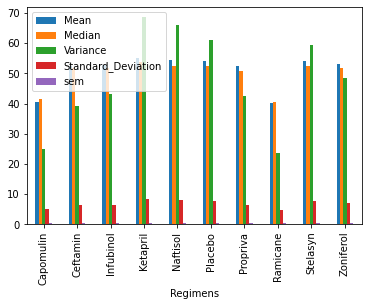

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_drug_regimen_df = drug_regimen_df.set_index('Regimens')
place = bar_drug_regimen_df.plot.bar()

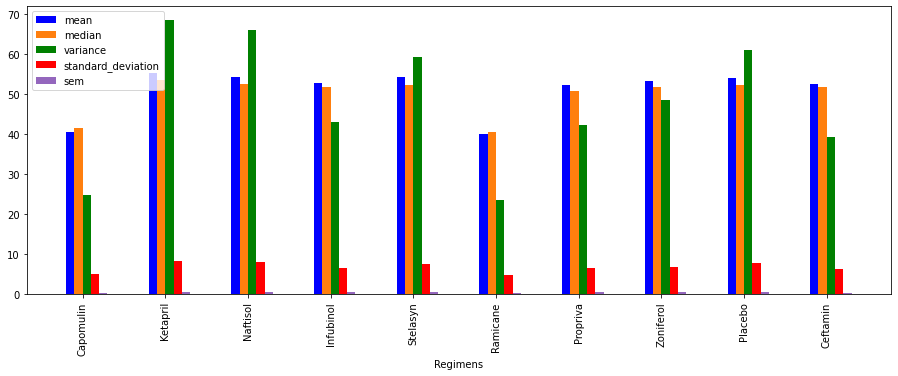

In [11]:
##### Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Save regimens as a list in the regimens_list variable
regimens_list = combined_data_df['Drug Regimen'].unique().tolist()

# Create numpy array with the number of labels you'll be using
X = np.arange(10)

# Save figure in the fig variable
fig = plt.figure()

# Set width to 2 and set height to 1 (in inches)
ax = fig.add_axes([0,0,2,1])

# Save the location for each of my variables in the tick_locations variable
tick_locations = [x for x in X]

# Set the labels on the x axis
plt.xticks(tick_locations, regimens_list)

# Rotate the labels on the x axis 90 degrees
ax.set_xticklabels(regimens_list, rotation=90)

# load the data to the bar graph
# Set the mean -.15 spaces away from the value of X so that it's .15 spaces away from the center
# Set the remaining spaces +.1 spaces more from the previous
ax.bar(X - 0.15, regimens['mean'], color = 'b', width = 0.1)
ax.bar(X - 0.05, regimens['median'], color = 'tab:orange', width = 0.1)
ax.bar(X + 0.05, regimens['variance'], color = 'g', width = 0.1)
ax.bar(X + 0.15, regimens['standard_deviation'], color = 'r', width = 0.1)
ax.bar(X + 0.25, regimens['sem'], color = 'tab:purple', width = 0.1)

# Create my legend, assign the labels, and move the labels to the upper-left side of the screen
ax.legend(labels=['mean', 'median', 'variance', 'standard_deviation', 'sem'], loc='upper left')

# Set the label of the x axis to Regimens
plt.xlabel("Regimens")

# Show the graph
plt.show()


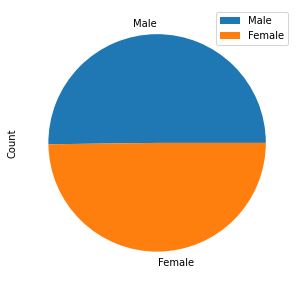

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Store the unique mice IDs in a list
all_unique_mice = combined_data_df['Mouse ID'].unique()

# Create a list for every male and female
male_list = []
female_list = []

# For every unique mouse ID
for mouse in all_unique_mice:
    # Check of the mouse ID is associated with a Male
    if combined_data_df.loc[lambda combined_data_df: combined_data_df['Mouse ID'] == mouse]['Sex'].unique()[0] == 'Male':
        # Save the male to the male_list list
        male_list.append(combined_data_df.loc[lambda combined_data_df: combined_data_df['Mouse ID'] == mouse]['Sex'].unique()[0])
    else:
        # Otherwise, set the mouse to the female list
        female_list.append(combined_data_df.loc[lambda combined_data_df: combined_data_df['Mouse ID'] == mouse]['Sex'].unique()[0])

# Create a DF for the Male/Female count and have the index be 'Male' and 'Female'
male_female_df = pd.DataFrame({
    'Count': [len(male_list), len(female_list)]},
    index=['Male', 'Female'])

# Using Pandas, create a pie chart with the male_female_df
plot = male_female_df.plot.pie(y='Count', figsize=(5, 5))

# This pie chart is loading the number of male mice and female mice. 
# Based on the pie chart, we can see there is a difference of 1 male mouse compared to female mice

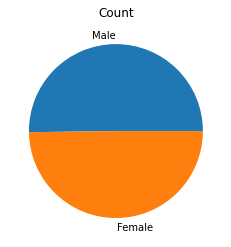

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Grab the number of male and female mice and save them in a list
m_f_counts = [male_female_df['Count'][0], male_female_df['Count'][1]]

# Set my labels and have them match the index of the male/female list
plot_labels = ['Male', 'Female']

# Create my pie chart, load my male/female counts, and set my labels
plt.pie(m_f_counts,labels=plot_labels)

# Set the title to Count
plt.title('Count')

# Show the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
mouse_id_list = []
drug_regiment_list = []
final_tumor_volume_list = []

# Start by getting the last (greatest) timepoint for each mouse

for mouse in combined_data_df['Mouse ID'].unique():
    # Store the regimen and final tumor volume in variables
    drug_regimen = combined_data_df.loc[lambda combined_data_df: combined_data_df['Mouse ID'] == mouse ]['Drug Regimen'].tolist()[-1]
    final_tumor = combined_data_df.loc[lambda combined_data_df: combined_data_df['Mouse ID'] == mouse ]['Tumor Volume (mm3)'].tolist()[-1]
    # If regimen is Capomulin
    if drug_regimen == treatments_list[0]:
        mouse_id_list.append(mouse)
        drug_regiment_list.append(drug_regimen)
        final_tumor_volume_list.append(final_tumor)
    # If regimen is Ramicane
    elif drug_regimen == treatments_list[1]:
        mouse_id_list.append(mouse)
        drug_regiment_list.append(drug_regimen)
        final_tumor_volume_list.append(final_tumor)
    # If regimen is Infubinol
    elif drug_regimen == treatments_list[2]:
        mouse_id_list.append(mouse)
        drug_regiment_list.append(drug_regimen)
        final_tumor_volume_list.append(final_tumor)
    # If regimen is Ceftamin
    elif drug_regimen == treatments_list[3]:
        mouse_id_list.append(mouse)
        drug_regiment_list.append(drug_regimen)
        final_tumor_volume_list.append(final_tumor)
        

mice_tumor_volume_df = pd.DataFrame({
    'Mouse ID': mouse_id_list,
    'Drug Regimen': drug_regiment_list,
    'Final Tumor Volume': final_tumor_volume_list
})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mice_tumor_volume_df = pd.merge(mouse_metadata_df, mice_tumor_volume_df, on='Mouse ID')
mice_tumor_volume_df = mice_tumor_volume_df.drop(['Drug Regimen_y'], axis=1)
mice_tumor_volume_df

,Mouse ID,Drug Regimen_x,Sex,Age_months,Weight (g),Final Tumor Volume
0,k403,Ramicane,Male,21,16,22.050126
1,s185,Capomulin,Female,3,17,23.343598
2,x401,Capomulin,Female,16,15,28.484033
3,m601,Capomulin,Male,22,17,28.430964
4,g791,Ramicane,Male,11,16,29.128472
...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,61.386660
96,y163,Infubinol,Female,17,27,67.685569
97,y769,Ceftamin,Female,6,27,68.594745
98,y865,Ceftamin,Male,23,26,64.729837


In [170]:
# Put treatments into a list for for loop (and later for plot labels)
all_drug_regimens_list = treatments_list
outliar_df = pd.DataFrame(all_drug_regimens_list, columns=['Regimens'])
high_outliar_list = []
low_outliar_list = []
 
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
tumors_lowest_to_greatest_vol = combined_data_df.sort_values(by=['Tumor Volume (mm3)'])
middle_value = round(tumors_lowest_to_greatest_vol['Tumor Volume (mm3)'].median())
four_regimens_df_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in all_drug_regimens_list:
    
    ordered_items = combined_data_df.loc[lambda combined_data_df:combined_data_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].sort_values(ascending=True)
    regimen_df = combined_data_df.loc[lambda combined_data_df:combined_data_df['Drug Regimen'] == regimen]
    # Second quartile (regimen_median)
    regimen_median = round(np.median(ordered_items))
    # First quartile (Q1)
    Q1 = np.median(ordered_items[:regimen_median])
    # Third quartile (Q3)
    Q3 = np.median(ordered_items[regimen_median:])
    # Interquartile (IQR)
    IQR = Q3 - Q1
    low_outliar = Q1 - (IQR * 1.5)
    high_outliar = Q3 + (IQR * 1.5)
    high_outliar_count = len(regimen_df.loc[lambda regimen_df:regimen_df['Tumor Volume (mm3)'] > high_outliar]['Mouse ID'])
    low_outliar_count = len(regimen_df.loc[lambda regimen_df:regimen_df['Tumor Volume (mm3)'] < low_outliar]['Mouse ID'])
    high_outliar_list.append(high_outliar_count)
    low_outliar_list.append(low_outliar_count)



    # Locate the rows which contain mice on each drug and get the tumor volumes
    no_high_outliar_df = regimen_df.loc[lambda regimen_df:regimen_df['Tumor Volume (mm3)'] < high_outliar]
    no_low_or_high_outliar_df = no_high_outliar_df.loc[lambda no_high_outliar_df:no_high_outliar_df['Tumor Volume (mm3)'] > low_outliar]
    four_regimens_df_list.append(no_low_or_high_outliar_df)

outliar_df['Low Outliars'] = high_outliar_list
outliar_df['High Outliars'] = low_outliar_list
regimen_mice_data = pd.DataFrame()
regimen_mice_data = pd.concat(four_regimens_df_list)
regimen_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1645,q483,25,52.430066,1,Ceftamin,Male,6,26
1646,q483,30,54.952226,1,Ceftamin,Male,6,26
1647,q483,35,59.253484,1,Ceftamin,Male,6,26
1648,q483,40,64.192341,1,Ceftamin,Male,6,26


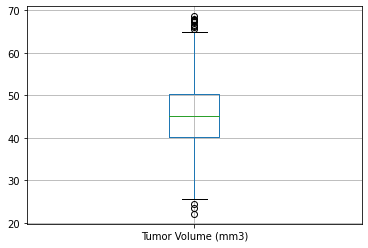

In [176]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regimen_mice_data.boxplot(column=['Tumor Volume (mm3)'])
plt.show()

## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
